In [65]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [66]:
state_file= ("Research Data/State_median_income.csv")
birthplace_file= ("Research Data/birth_dataframe.csv")
salary_file= ("Research Data/NBAsalaries.csv")

state_df= pd.read_csv(state_file)
state_df.head()
income_poverty_df= state_df[['Name', 'Poverty Percent, All Ages', 'Median Household Income']]
income_poverty_df= income_poverty_df.rename(columns=({'Name': 'State'}))
income_poverty_df.head()
#income_poverty_df.dtypes

,State,"Poverty Percent, All Ages",Median Household Income
0,United States,13.1,61937.0
1,Alabama,16.8,49881.0
2,Alaska,11.1,74912.0
3,Arizona,14.1,59079.0
4,Arkansas,16.8,47094.0


In [67]:
birthplace_df= pd.read_csv(birthplace_file)
birthplace_df.head()

,Player,Date,City,State
0,Aaron Gordon,Sep 16 1995,San Jose,California
1,Aaron Holiday,Sep 30 1996,Ruston,Louisiana
2,Alec Burks,Jul 20 1991,Grandview,Missouri
3,Al-Farouq Aminu,Sep 21 1990,Atlanta,Georgia
4,Alfonzo McKinnie,Sep 17 1992,Chicago,Illinois


In [68]:
salary_df= pd.read_csv(salary_file)
salary_df.head()

,Player,2019-20
0,A.J. Hammons,350087
1,Aaron Gordon,19863636
2,Aaron Holiday,2239200
3,Abdel Nader,1618520
4,Admiral Schofield,898310


In [74]:
#Merge Dataframes to get Players with their birth State, salary, state household income, and state poverty percent
merged_household= pd.merge(income_poverty_df, birthplace_df, how='inner', on= ('State'))
merged_household['Median Household Income']= merged_household['Median Household Income'].astype(int)
merged_salary= pd.merge(merged_household, salary_df, how='inner', on=('Player'))
merged_salary= merged_salary.rename(columns={'2019-20': 'Player Salary'})

state_groupby= merged_salary.groupby('State')
state_income= state_groupby['Median Household Income'].mean()


state_groupby_df= pd.DataFrame(state_income)
state_groupby_df['# of Players Birthstate']= state_groupby['Player'].count()


state_groupby_df['Cumulative Player Salary']= state_groupby['Player Salary'].sum()
state_groupby_df['Median Player Salary']= state_groupby['Player Salary'].median()
state_groupby_df['Poverty Percent']= state_groupby['Poverty Percent, All Ages'].mean()
state_groupby_df.sort_values(['Median Player Salary'],ascending=False, inplace=True)

state_groupby_df.to_csv("Research Data/state_calculations.csv", index=True)

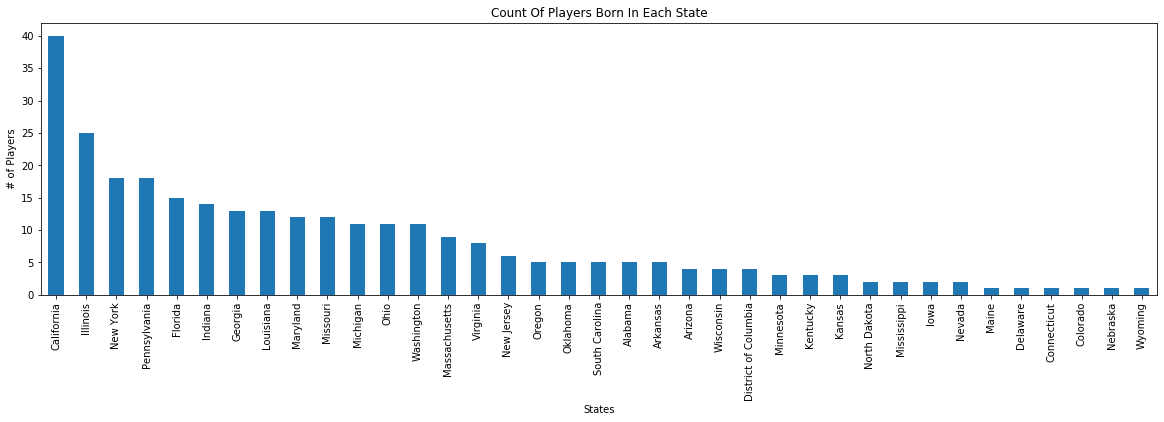

<Figure size 432x288 with 0 Axes>

In [70]:
state_player_count= state_groupby['Player'].count()

data_to_plot= pd.DataFrame(state_player_count)
data_to_plot= data_to_plot.sort_values(['Player'], ascending=False)

state_player_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(20,5))
state_player_chart.set_xlabel('States')
state_player_chart.set_ylabel('# of Players')
state_player_chart.set_title('Count Of Players Born In Each State')

plt.show()
plt.tight_layout()

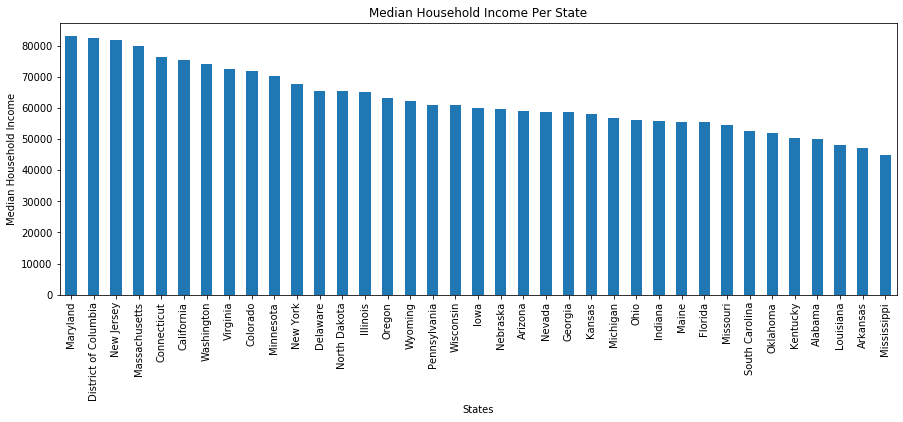

<Figure size 432x288 with 0 Axes>

In [71]:
state_median_income= state_groupby['Median Household Income'].mean()

data_to_plot= pd.DataFrame(state_median_income)
data_to_plot= data_to_plot.sort_values(['Median Household Income'], ascending=False)

state_household_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(15,5))
state_household_chart.set_xlabel('States')
state_household_chart.set_ylabel('Median Household Income')
state_household_chart.set_title('Median Household Income Per State')

plt.show()
plt.tight_layout()

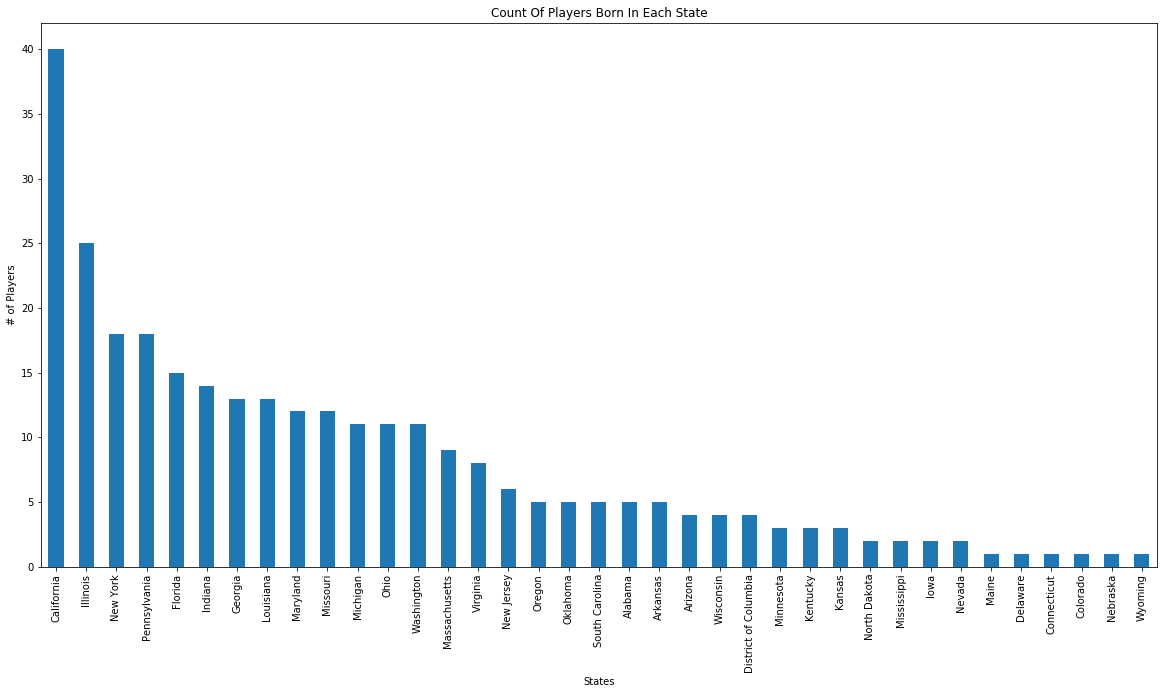

<Figure size 432x288 with 0 Axes>

In [72]:
state_player_count= state_groupby['Player'].count()

data_to_plot= pd.DataFrame(state_player_count)
data_to_plot= data_to_plot.sort_values(['Player'], ascending=False)

state_player_chart= data_to_plot.plot(kind='bar', legend=False, figsize=(20,10))
state_player_chart.set_xlabel('States')
state_player_chart.set_ylabel('# of Players')
state_player_chart.set_title('Count Of Players Born In Each State')

plt.show()
plt.tight_layout()

The correlation between both factors is -0.06


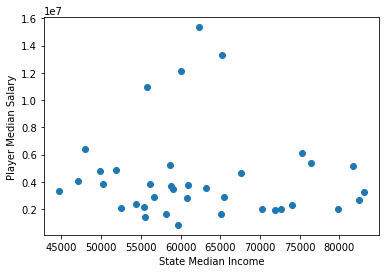

In [73]:
x_data= state_groupby_df.iloc[:,0]
y_data= state_groupby_df.iloc[:,3]
correlation = st.pearsonr(x_data,y_data)
plt.scatter(x_data,y_data)
plt.xlabel('State Median Income')
plt.ylabel('Player Median Salary')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()